It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). Look at the equation below:
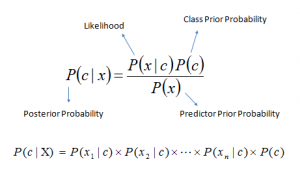
* P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
* P(c) is the prior probability of class.
* P(x|c) is the likelihood which is the probability of predictor given class.
* P(x) is the prior probability of predictor.

How does it work?

Step 1: Convert the data set into a frequency table

Step 2: Create Likelihood table by finding the probabilities like Overcast probability = 0.29 and probability of playing is 0.64.
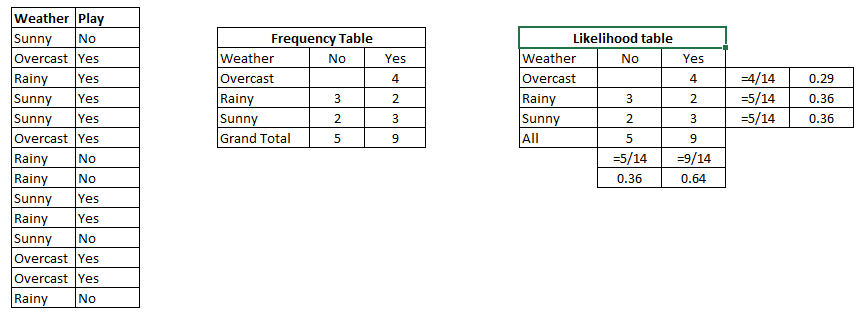
Step 3: Now, use Naive Bayesian equation to calculate the posterior probability for each class. The class with the highest posterior probability is the outcome of prediction.

https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

In [1]:
import csv
import random
import math

In [2]:
def loadCsv(filename):
    lines = csv.reader(open(filename)) 
    #lines is just a csv reader i.e. a pointer to iterate a csv file
    dataset = list(lines) # list of examples
    for i in range(len(dataset)):
        # for every example, convert every column value from string to foating value
        dataset[i] = [float(x) for x in dataset[i]]
    # return the dataset as a floating value
    return dataset

In [3]:
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio) # no of examples for training data
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        # randomly choose an example to be part of training dataset
        trainSet.append(copy.pop(index))
        # then remove from copy list and append to the training set
    return [trainSet, copy]

In [4]:
def separateByClass(dataset):
    separated = {} #  dictionary of key,value where key is the class and value is the list of examples
    for i in range(len(dataset)):
        # for every example in the list of examples as a dataset
        vector = dataset[i]
        # vector is a variable that is a list of floating values i.e. vector is the example
        if (vector[-1] not in separated):
            # if the classification is new then recognise it 
            separated[vector[-1]] = []
            # create a new key in the dictionary
        separated[vector[-1]].append(vector)
        # append the example to the list of the key class
        
    # return the dictionary where examples are divided
    return separated

In [5]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

In [6]:
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

In [7]:
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    # calculate the mean and standard deviation for every column in the dataset and insert as tuple in the list of summaries
    del summaries[-1]
    # delete the tuple about the column of classes
    
    # finally return the list of tuples
    return summaries

In [8]:
def summarizeByClass(dataset):
    separated = separateByClass(dataset) # separated is a dictionary of key,value where key is the class and value is the list of examples
    summaries = {}
    for classValue, instances in separated.items():
        # dictionary.items() returns a list of tuple(key,value)
        # separated -> calssValue = key and instances = list of examples 
        summaries[classValue] = summarize(instances)
        # summaries is a dictionary of key,values where key = class and value = list of tuples(mean and stdev of attribute)
        
    # finally return this dictionary
    return summaries

In [9]:
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

In [10]:
def calculateClassProbabilities(summaries, inputVector):
    # dictionary about mean and stdev of every attribute of examples of every class
    # inputVector is the example to be classified
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        # for evey key,value in the summaries dictionary assign the prior probability as 1
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            # len(classSummaries) gives the no, of attributes
            # Extract the mean and stdev values from the value in the tuple about the attribute( i.e. col)
            mean, stdev = classSummaries[i]
            x = inputVector[i] # x is the float value of the attribute at the example to be classified
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
            # cascade the multiplication as it is the bayesian idea of "what is the probability of B happening if A happened"
            
    # Return the dictionary of probabilities for every class for that example
    return probabilities

In [11]:
def predict(summaries, inputVector):
    # dictionary about mean and stdev of every attribute of examples of every class
    # inputVector is the example to be classified
    probabilities = calculateClassProbabilities(summaries, inputVector)# the dictionary of Bayesian probabilities for every class for that example
    bestLabel, bestProb = None, -1
    # initialisation
    for classValue, probability in probabilities.items():
        # find the max probability and eventually the class for that example
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    
    # return the classification
    return bestLabel 

In [12]:
def getPredictions(summaries, testSet):
    # dictionary about mean and stdev of every attribute of examples of every class
    predictions = []
    for i in range(len(testSet)):
        # for every example in test datset, classify
        result = predict(summaries, testSet[i]) # example is classified
        predictions.append(result) # append the predicted class into the list
        
    # return the list of predicted classes for the test examples
    return predictions

In [13]:
def getAccuracy(testSet, predictions):
    correct = 0
    # calculate the no. of examples correctly classified
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            #testSet[i][-1] = value of the class i.e. the last column value for that example
            correct += 1
            
    # fianlly return the percentage of the accuracy
    return (correct/float(len(testSet))) * 100.0

In [14]:
def main():
    filename = 'pima-indians-diabetes.csv'
    splitRatio = 0.67 # parts of dataset used to train the model
    dataset = loadCsv(filename) # method that returns the dataset with float values
    trainingSet, testSet = splitDataset(dataset, splitRatio) # method that splits the dataset
    print("Training set:",type(trainingSet)) # training set is a list of rows(in format of lists)
    print(f"Split {len(dataset)} rows into train={len(trainingSet)} and test={len(testSet)} rows")
    summaries = summarizeByClass(trainingSet) # dictionary about mean and stdev of every attribute of examples of every class
    predictions = getPredictions(summaries, testSet) # the list of predicted classes for the test examples
    accuracy = getAccuracy(testSet, predictions) # to find the accuracy in the predictions
    print(f'Accuracy: {accuracy}%')
main()

Training set: <class 'list'>
Split 768 rows into train=514 and test=254 rows
Accuracy: 71.25984251968504%
